In [126]:
%matplotlib inline
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)

In [127]:
# 收集数据
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

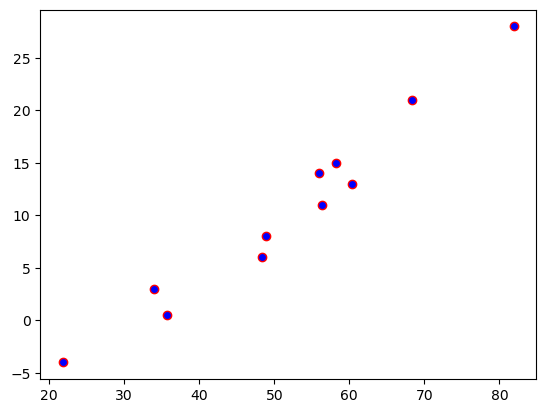

In [128]:
# 查看数据
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(t_u, t_c, c='b', edgecolors='r')
plt.show()

In [129]:
# 定义模型
def model(t_u, w, b):
    return w * t_u + b

In [130]:
# 损失函数
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [131]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [132]:
w

tensor(1.)

In [133]:
# 计算损失
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [134]:
w = torch.zeros(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [135]:
loss = loss_fn(t_p, t_c)
loss

tensor(187.3864)

## 损失函数

In [136]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs


# 链式求导法则
def dmodel_dw(t_u, w, b):
    return t_u


def dmodel_db(t_u, w, b):
    return 1.0

In [137]:
# 计算梯度
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [138]:
# 设置学习率
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (
        2.0 * delta)

learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (
        2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [139]:
# 训练模型
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [140]:
training_loop(
    n_epochs=100,
    learning_rate=1e-5,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 1565.761353
Epoch 3, Loss 1390.265503
Epoch 4, Loss 1234.812378
Epoch 5, Loss 1097.112793
Epoch 6, Loss 975.139709
Epoch 7, Loss 867.096741
Epoch 8, Loss 771.393005
Epoch 9, Loss 686.619385
Epoch 10, Loss 611.527405
Epoch 11, Loss 545.011597
Epoch 12, Loss 486.092102
Epoch 13, Loss 433.901764
Epoch 14, Loss 387.671875
Epoch 15, Loss 346.721710
Epoch 16, Loss 310.448425
Epoch 17, Loss 278.317719
Epoch 18, Loss 249.856598
Epoch 19, Loss 224.645859
Epoch 20, Loss 202.314407
Epoch 21, Loss 182.533356
Epoch 22, Loss 165.011398
Epoch 23, Loss 149.490631
Epoch 24, Loss 135.742371
Epoch 25, Loss 123.564278
Epoch 26, Loss 112.776932
Epoch 27, Loss 103.221649
Epoch 28, Loss 94.757591
Epoch 29, Loss 87.260178
Epoch 30, Loss 80.619034
Epoch 31, Loss 74.736320
Epoch 32, Loss 69.525452
Epoch 33, Loss 64.909691
Epoch 34, Loss 60.821049
Epoch 35, Loss 57.199379
Epoch 36, Loss 53.991299
Epoch 37, Loss 51.149609
Epoch 38, Loss 48.632435
Epoch 39, Loss 46.402737
Ep

tensor([ 0.2340, -0.0165])

## 数据归一化

In [141]:
# 简单归一化
t_un = 0.1 * t_u
training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [142]:
# 使用超参数优化模型效果
params = training_loop(
    n_epochs=3000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

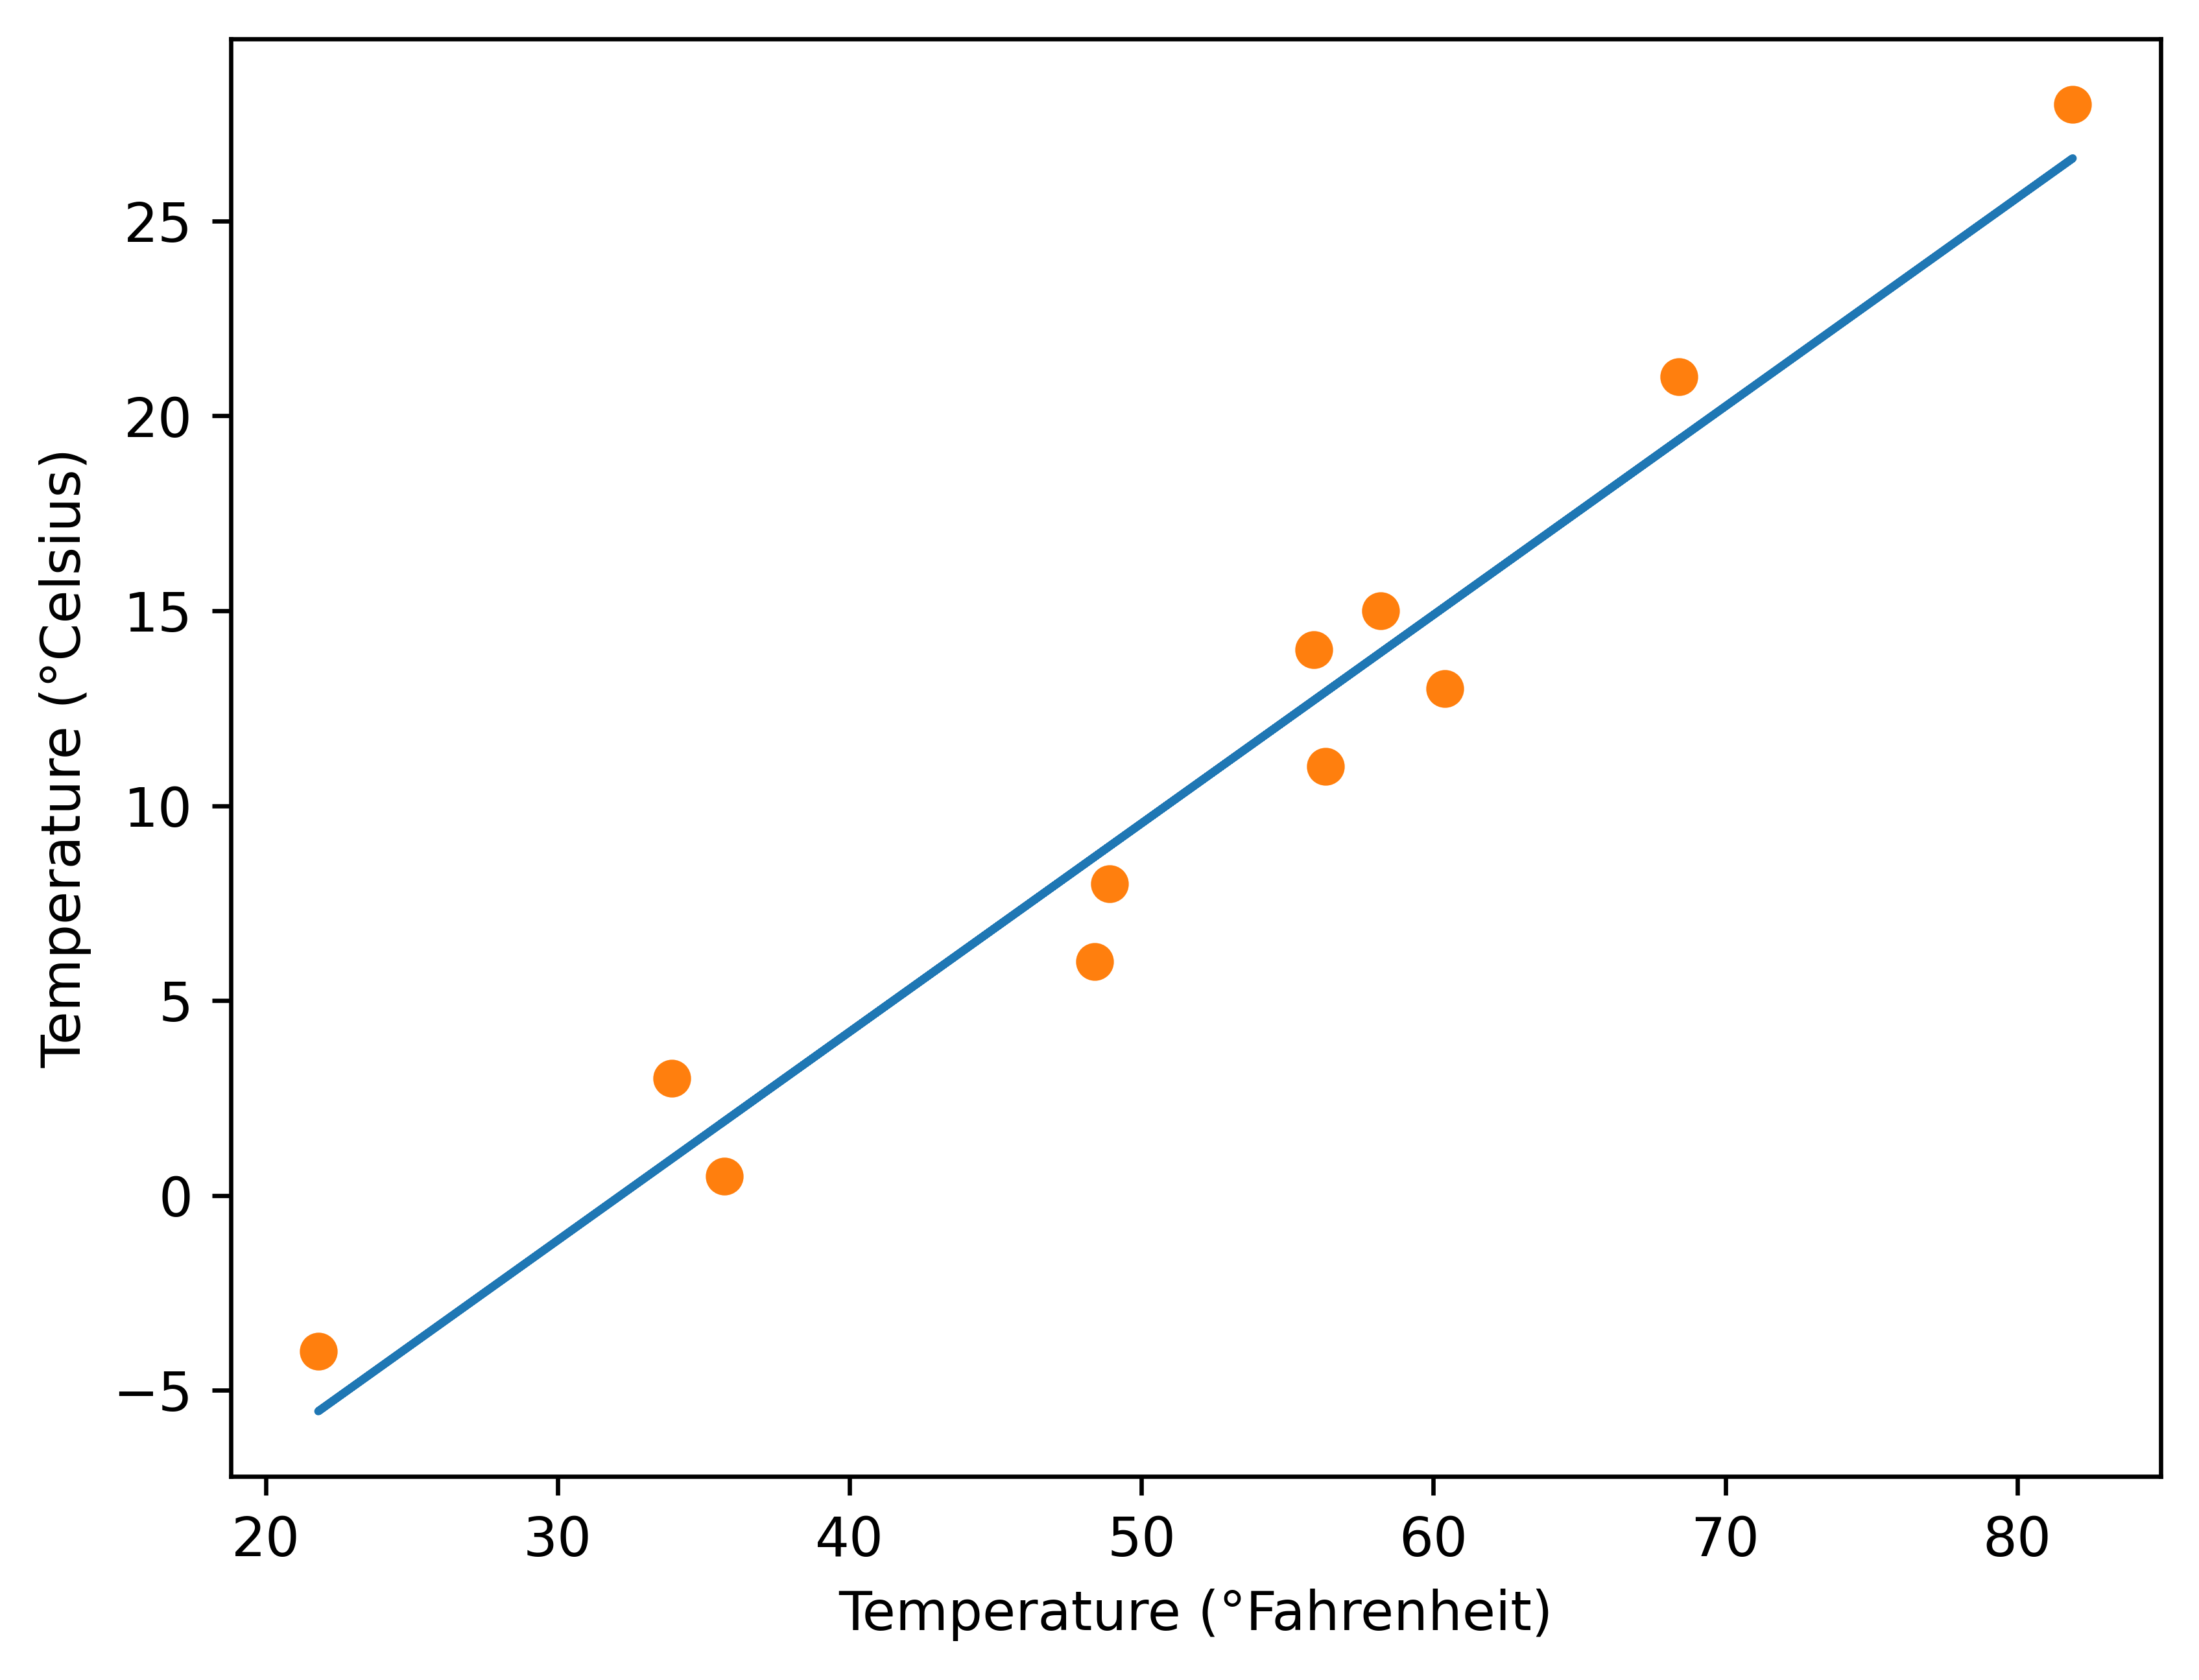

In [143]:
# 画图
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
# plt.savefig("temp_unknown_plot.png", format("png"))
plt.show()

In [144]:
# 使用pytorch自动计算梯度
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [145]:
# 反向传播
# 每次迭代时需要将梯度置为零
if params.grad is not None:
    params.grad.zero_()
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
# 查看梯度
params.grad

tensor([4517.2969,   82.6000])

In [146]:
# 更新训练环节
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [147]:
params = training_loop(
    n_epochs=3000,
    learning_rate=1e-2,
    params=params,
    t_u=t_un,
    t_c=t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648


In [149]:
# 使用优化器
import torch.optim as optim

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [150]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)